In [ ]:
!pip install padelpy

     |████████████████████████████████| 20.9 MB 1.3 MB/s 


# Coronavirus COVID-19 Tweets

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F769452%2F35db2dd68238bfd958efdabebc9fef8f%2Fcovid-19-4961257_1280-e1586986896105.jpg?generation=1595760042647275&alt=media" width="400"></img>


# Introduction

>Corona-virus eda analysis that uses Twitter API, **tweepy** and Python package to explore the tweets generated by users.

- toc: true
- badges: true
- comments: true
- categories: [padelpy, corona-virus, scikit-learn]
- image: https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F769452%2F35db2dd68238bfd958efdabebc9fef8f%2Fcovid-19-4961257_1280-e1586986896105.jpg?generation=1595760042647275&alt=media

# Data preparation

## Load packages

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

## Load data

In [ ]:
tweets_df = pd.read_csv("covid19_tweets.csv")

# Data exploration


## Glimpse the data

In [ ]:
print(f"data shape: {tweets_df.shape}")

In [ ]:
tweets_df.info()

In [ ]:
tweets_df.describe()

In [ ]:
tweets_df.head()

### Missing data

In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(tweets_df)

### Unique values

In [ ]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [ ]:
unique_values(tweets_df)

### Most frequent values

In [ ]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [ ]:
most_frequent_values(tweets_df)

## Visualize the data distribution

In [ ]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

### User name

In [ ]:
plot_count("user_name", "User name", tweets_df,4)

### User location

In [ ]:
plot_count("user_location", "User location", tweets_df,4)

### Tweet source

In [ ]:
plot_count("source", "Source", tweets_df,4)

In [ ]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

### Text wordcloauds

In [ ]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

In [ ]:
india_df = tweets_df.loc[tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

In [ ]:
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

In [ ]:
us_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from UK')

In [ ]:
us_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from Canada')

In [ ]:
india_df = tweets_df.loc[tweets_df.user_location=="South Africa"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from South Africa')

In [ ]:
india_df = tweets_df.loc[tweets_df.user_location=="Switzerland"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from Switzerland')

In [ ]:
us_df = tweets_df.loc[tweets_df.user_location=="London"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from London')

### Hashtags analysis

In [ ]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()


In [ ]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [ ]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

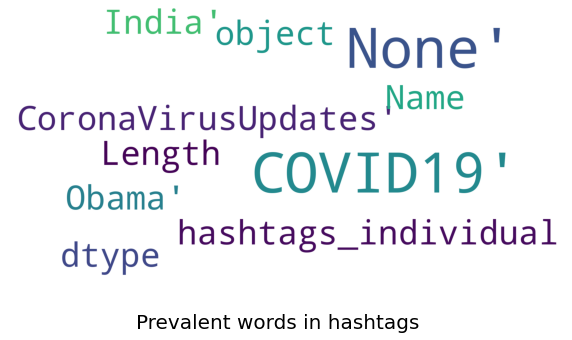

In [ ]:
show_wordcloud(tweets_df['hashtags_individual'], title = 'Prevalent words in hashtags')

### Extract country from location

We load the country list from the additional database we added to this Notebook. We also create a `country` column in the original dataset.

In [ ]:
country_df = pd.read_csv("../input/iso-country-codes-global/wikipedia-iso-country-codes.csv")

FileNotFoundError: ignored

In [ ]:
country_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso"]
country_df.head()

In [ ]:
tweets_df['country'] = tweets_df['user_location']

We merge the countries dataset with the tweets dataset.

In [ ]:
tweets_df = tweets_df.merge(country_df, on="country")

In [ ]:
tweets_df.head(10)

In [ ]:
tw_add_df = tweets_df.groupby(["country", "iso", "alpha3"])['text'].count().reset_index()
tw_add_df.columns = ["country", "iso", "alpha3", "tweets"]

In [ ]:
import plotly.express as px

def plot_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"country: {row['country']}<br>tweets: {row['tweets']}\
                          <br>country code: {row['iso']}<br>country alpha3: {row['alpha3']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="alpha3",
                        hover_name='hover_text',
                        color="tweets",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=900, height=700)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="world")
    fig.show()    

In [ ]:
plot_map(tw_add_df, "Tweets per country (where country is specified)")

### Extract date and time features

In [ ]:
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])

In [ ]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

### Time variation

In [ ]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [ ]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

In [ ]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

In [ ]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

In [ ]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)

In [ ]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)

In [ ]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

In [ ]:
plot_count("minute", "tweets / minute", tweets_df,size=5, ordered=False)